In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = "substr_labelled.json"
data = pd.read_json(filename)
data.head()

,input,output,gold,pred_cause,pred_effect,gold_cause,gold_effect,cause_substr,effect_substr,cause_excess,cause_excess_count,effect_excess,effect_excess_count,valid
0,"BB&T and SunTrust have completed their merger,...",[Cause] BB&T and SunTrust have completed their...,[Cause] BB&T and SunTrust have completed their...,"BB&T and SunTrust have completed their merger,...",drive the next step up in profitability for th...,"BB&T and SunTrust have completed their merger,...",which we believe will drive the next step up i...,True,True,,0,which we believe will,4,True
1,Given Tulip's lack of profitability (managemen...,[Cause] Tulip's lack of profitability [Relatio...,[Cause] Given Tulip's lack of profitability (m...,Tulip's lack of profitability,we do not believe the business maintains a cos...,Given Tulip's lack of profitability (managemen...,we do not believe the business maintains a cos...,True,True,given (management has stated the business was...,17,,0,True
2,"That said, Wynn has recently renovated rooms a...",[Cause] Wynn has recently renovated rooms and ...,[Cause] Wynn has recently renovated rooms and ...,Wynn has recently renovated rooms and the gami...,the facility maintain market share over the ne...,Wynn has recently renovated rooms and the gami...,help the facility maintain market share over t...,True,True,,0,help,1,True
3,We expect that management will continue to pur...,[Cause] management will continue to pursue acq...,[Cause] management will continue to pursue ac...,management will continue to pursue acquisition...,further lower the cyclicality of Fortive's por...,management will continue to pursue acquisition...,the cyclicality of Fortive's portfolio,True,True,,0,further lower,2,True
4,We expect a primary growth driver to be the 20...,[Cause] Beyond's products emit 90% less greenh...,[Cause] Beyond's products emit 90% less green...,Beyond's products emit 90% less greenhouse gas...,a primary growth driver to be the 20% of consu...,Beyond's products emit 90% less greenhouse gas...,the 20% of consumers willing to adjust their h...,True,True,than their meat equivalents,4,a primary growth driver to be,6,True


In [3]:
print(data["valid"].value_counts())
print(data["valid"].value_counts(normalize=True))

valid
True     724
False    282
Name: count, dtype: int64
valid
True     0.719682
False    0.280318
Name: proportion, dtype: float64


In [4]:
# Melt the dataframe
df_melted = data.melt(
    id_vars="valid",
    value_vars=["cause_excess_count", "effect_excess_count"],
    var_name="type",
    value_name="count",
)

# Map the 'type' column to more readable values
df_melted["type"] = df_melted["type"].map(
    {"cause_excess_count": "cause", "effect_excess_count": "effect"}
)

# Group by 'valid' and 'type' and calculate mean
df_avg = df_melted.groupby(["valid", "type"]).mean().reset_index()

# Rename the columns
df_avg.columns = ["valid", "type", "average"]
df_avg.head()

,valid,type,average
0,False,cause,7.400709
1,False,effect,6.691489
2,True,cause,1.830110
3,True,effect,2.379834


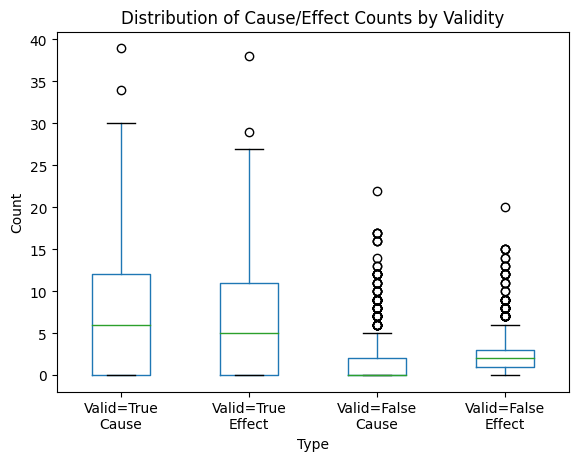

In [5]:
df_melted.boxplot(column="count", by=["valid", "type"], grid=False)

plt.title("Distribution of Cause/Effect Counts by Validity")
plt.suptitle("")
plt.ylabel("Count")
plt.xlabel("Type")
plt.xticks(
    [1, 2, 3, 4],
    [
        "Valid=True\nCause",
        "Valid=True\nEffect",
        "Valid=False\nCause",
        "Valid=False\nEffect",
    ],
)
plt.show()

In [9]:
print(
    df_melted.groupby(["valid", "type"])["count"].describe()
    .reset_index()
    .to_markdown(index=False, tablefmt="simple")
)

valid    type      count     mean      std    min    25%    50%    75%    max
-------  ------  -------  -------  -------  -----  -----  -----  -----  -----
False    cause       282  7.40071  7.42788      0      0      6     12     39
False    effect      282  6.69149  7.04287      0      0      5     11     38
True     cause       724  1.83011  3.24902      0      0      0      2     22
True     effect      724  2.37983  2.83003      0      1      2      3     20
